## 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('youtube_kr.csv', index_col=0)
df.head(5)

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,tags_split,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,uq5LClQN3cE,안녕하세요 보겸입니다,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,24,2020-08-12 00:00:00,Wednesday,2020-08-09 00:00:00,1900-01-01 09:32:48,Sunday,...,"['보겸', 'bokyem']",2,5947503,61,53326,105756,139946,0,0,0
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],UCRuSxVu4iqTK5kCh90ntAgA,총몇명,1,2020-08-12 00:00:00,Wednesday,2020-08-12 00:00:00,1900-01-01 09:00:08,Wednesday,...,"['총몇명', '재밌는 만화', '부락토스', '루시퍼', '총몇명 프리퀄', '총...",6,963384,228,28244,494,3339,0,0,1
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,22,2020-08-12 00:00:00,Wednesday,2020-08-10 00:00:00,1900-01-01 09:54:13,Monday,...,"['양팡', '양팡유튜브', '팡튜브', '가족시트콤', '양팡가족', '양팡가족시...",27,2950885,0,17974,68898,50688,0,0,0
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,24,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 15:00:58,Tuesday,...,"['꽈뚜룹', '한국여행기', 'quaddurup', '뚜룹이', 'korea', ...",12,1743374,81,36893,1798,8751,0,0,1
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,"['JYP Entertainment', 'JYP', 'J.Y.Park', 'JYPa...",13,3433885,257,353337,9763,23405,0,0,1


## 데이터전처리

In [2]:
import numpy as np

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df
df = reduce_mem_usage(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79541 entries, 0 to 79540
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           79541 non-null  object
 1   video_title        79541 non-null  object
 2   channel_id         79541 non-null  object
 3   channel_title      79541 non-null  object
 4   category           79541 non-null  int8  
 5   trending_date      79541 non-null  object
 6   trending_week      79541 non-null  object
 7   publishedAt_date   79541 non-null  object
 8   publishedAt_time   79541 non-null  object
 9   publishedAt_week   79541 non-null  object
 10  duration           79541 non-null  int8  
 11  tags_split         79541 non-null  object
 12  tags_len           79541 non-null  int16 
 13  view_count         79541 non-null  int32 
 14  play_time          79541 non-null  int32 
 15  likes              79541 non-null  int32 
 16  dislikes           79541 non-null  int32

In [3]:
# 첫번째로 인기동영상이 된 데이터가 의미 있다고 판단.
df=df.drop_duplicates(['video_id'], keep = 'first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10921 entries, 0 to 79362
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  object
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  object
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

In [4]:
# 추가 데이터
df["video_len"]=0
df["channel_len"]=0

for i in range(len(df)):    
    df["video_len"].iloc[i]=len(df["video_title"].iloc[i])
    df["channel_len"].iloc[i]=len(df["channel_title"].iloc[i])

C:\Users\yhg31\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [5]:
df["duration"].describe()

count   10921.00
mean        7.28
std         3.07
min         1.00
25%         5.00
50%         7.00
75%         9.00
max        24.00
Name: duration, dtype: float64

In [6]:
#인기 영상이 되는 일수를 일주일은 너무 긴거 같아서 25%의 값인 5로 잡음
df1=df[df["duration"]>7]
df2=df[df["duration"]<=7]
df1["pred"]=1
df2["pred"]=0
df=pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True)
df

C:\Users\yhg31\AppData\Local\Temp/ipykernel_1624/158586571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pred"]=1
C:\Users\yhg31\AppData\Local\Temp/ipykernel_1624/158586571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pred"]=0


,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday,...,257,353337,9763,23405,0,0,1,48,17,1
1,I4Z0_AygkJg,오가나 입니다.,UC8av1CNslnPQS3N08rkzzhQ,오프라이드oh-pride,2,2020-08-14 00:00:00,Friday,2020-08-14 00:00:00,1900-01-01 03:10:50,Friday,...,0,2309,5441,2537,0,0,0,8,13,1
2,z6q98btlSh4,'최초 공개' 댄싱킹★ '박진영'의 'When We Disco(Duet with 선...,UCbD8EppRX3ZwJSou-TVo90A,Mnet K-POP,24,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 13:15:01,Thursday,...,364,28722,609,2122,0,0,1,52,10,1
3,mZuzd1B-Mm8,＂너 목소리가 너무 커!!!!＂ 유치뽕짝 말장난의 달인 탁재훈 모음ZIP. 1탄 [...,UCy-swBYpRZx7KW11FStjTgw,레알예능 스브스,24,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 09:00:30,Thursday,...,971,5075,362,822,0,0,1,60,8,1
4,XrBgWl6jX5Y,(현장취재) 광화문 100만 모였다! 광화문으로 계속 집결 중! / 신의한수 20....,UCgOLQwRv1r2m9mhE1tfsn3Q,신의한수,25,2020-08-15 00:00:00,Saturday,2020-08-15 00:00:00,1900-01-01 12:12:49,Saturday,...,30216,98992,3349,396,0,0,1,51,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,esQPl9_rA6U,전국민의 99%가 홍합으로 알고 먹는 이것의 정체,UCY2uWQDCzn_ZE-JpTfDRR2A,입질의추억TV jiminTV,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday,...,799,4509,135,407,0,0,1,27,15,0
10917,WL4ipAjcspE,[웰메이드 X 임영웅] 21FW 시즌 화보 촬영 비하인드 영상 공개,UCgeeQuH16jS4UEOIxc-kwoQ,웰메이드,24,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday,...,410,17438,57,1136,0,0,1,37,4,0
10918,yqLla5LbpH8,사랑인가? 증오인가? 애정과 비명이 난무하는 아리랑은고양이 채널 통역!,UC69l_rtlCQ7M4Mz2RCS80BA,미야옹철의 냥냥펀치,15,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday,...,744,4399,34,280,0,0,1,39,10,0
10919,n028FLMfsSY,송편 안에 100만원이 들어가 있는 100만원짜리 대왕 송편 선물하기,UC1dK7oMUSR9Rnk1BSpOKZng,정선호,22,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday,...,917,6545,168,561,0,0,1,38,3,0


In [7]:
#데이터를 불러올때마다 날짜와 관련된 코드는 이상이 있음
df.iloc[:, 5:10]

,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week
0,2020-08-12 00:00:00,Wednesday,2020-08-11 00:00:00,1900-01-01 09:00:13,Tuesday
1,2020-08-14 00:00:00,Friday,2020-08-14 00:00:00,1900-01-01 03:10:50,Friday
2,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 13:15:01,Thursday
3,2020-08-14 00:00:00,Friday,2020-08-13 00:00:00,1900-01-01 09:00:30,Thursday
4,2020-08-15 00:00:00,Saturday,2020-08-15 00:00:00,1900-01-01 12:12:49,Saturday
...,...,...,...,...,...
10916,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:01:25,Tuesday
10917,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 02:00:05,Tuesday
10918,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 10:00:33,Tuesday
10919,2021-09-22 00:00:00,Wednesday,2021-09-21 00:00:00,1900-01-01 05:26:41,Tuesday


In [8]:
df["trending_week"]=df["trending_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["publishedAt_week"]=df["publishedAt_week"].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0, 1, 2, 3, 4, 5, 6])
df["trending_date"]=df["trending_date"].str.split(' ').str[0]
df["publishedAt_date"]=df["publishedAt_date"].str.split(' ').str[0]
df["publishedAt_time"]=df["publishedAt_time"].str.split(' ').str[1]

In [9]:
df["trending_week"].value_counts()

4    1635
3    1607
2    1603
0    1588
5    1583
6    1519
1    1386
Name: trending_week, dtype: int64

In [10]:
df["publishedAt_week"].value_counts()

4    1792
3    1719
2    1634
1    1523
0    1476
5    1459
6    1318
Name: publishedAt_week, dtype: int64

In [11]:
df.iloc[:, 5:9]

,trending_date,trending_week,publishedAt_date,publishedAt_time
0,2020-08-12,2,2020-08-11,09:00:13
1,2020-08-14,4,2020-08-14,03:10:50
2,2020-08-14,4,2020-08-13,13:15:01
3,2020-08-14,4,2020-08-13,09:00:30
4,2020-08-15,5,2020-08-15,12:12:49
...,...,...,...,...
10916,2021-09-22,2,2021-09-21,10:01:25
10917,2021-09-22,2,2021-09-21,02:00:05
10918,2021-09-22,2,2021-09-21,10:00:33
10919,2021-09-22,2,2021-09-21,05:26:41


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

In [13]:
df=df.sort_values(by=['trending_date'], axis=0)
df.reset_index(inplace=True, drop=True)
df.head()

,video_id,video_title,channel_id,channel_title,category,trending_date,trending_week,publishedAt_date,publishedAt_time,publishedAt_week,...,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,pred
0,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,2,2020-08-11,09:00:13,1,...,257,353337,9763,23405,0,0,1,48,17,1
1,IOe0GGG2wcg,태권도장에서 당했던 잊혀지지 않는 사건... ㅣ사연툰,UCHj3qb7u4WUfUrjlOJtPdKA,호돌이 영상툰,1,2020-08-12,2,2020-08-10,02:45:00,0,...,0,4642,126,1359,0,0,1,29,7,0
2,DNOOxqIus08,멸치국수 천원??전메뉴 5개 다먹어도 6500원.. 두번 먹었습니다!!,UCsNVs68quFJMaDmR6frfUsQ,야식이,24,2020-08-12,2,2020-08-08,14:37:55,5,...,1070,14089,410,2175,0,0,1,39,3,0
3,NFa38a2XStM,이게 왜 진짜야..? 실제 있었던 일인데도 주작같은 황당한 실화 TOP10,UCvi7EYzMlfSB0ZkX55i5LlA,타임스낵,24,2020-08-12,2,2020-08-08,02:00:02,5,...,330,13347,197,2524,0,0,1,41,4,0
4,F1gLID2d8qY,칸토 (KANTO) 'I'm So Fine (Feat. 김호중)' LYRIC VIDEO,UCAkWpyeieFjzS7GzSJMArhQ,BRANDNEW MUSIC,10,2020-08-12,2,2020-08-09,09:00:08,6,...,207,7260,23,1507,0,0,1,48,14,0


In [14]:
#데이터가 딱 두개로 나뉘는 이쁜 형태가 아님.
df["pred"].value_counts()

0    6033
1    4888
Name: pred, dtype: int64

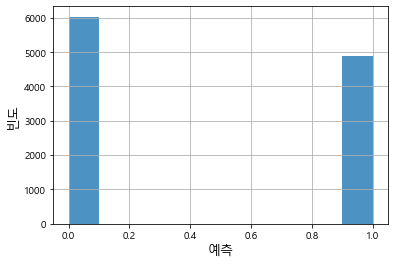

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import seaborn as sns
font_name=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family=font_name) 

plt.hist(df["pred"], bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   video_title        10921 non-null  object
 2   channel_id         10921 non-null  object
 3   channel_title      10921 non-null  object
 4   category           10921 non-null  int8  
 5   trending_date      10921 non-null  object
 6   trending_week      10921 non-null  int64 
 7   publishedAt_date   10921 non-null  object
 8   publishedAt_time   10921 non-null  object
 9   publishedAt_week   10921 non-null  int64 
 10  duration           10921 non-null  int8  
 11  tags_split         10921 non-null  object
 12  tags_len           10921 non-null  int16 
 13  view_count         10921 non-null  int32 
 14  play_time          10921 non-null  int32 
 15  likes              10921 non-null  int32 
 16  dislikes           10921 non-null  int32

## 데이터 샘플링

In [17]:
X=df[["category", "publishedAt_week", "tags_len", "view_count", "play_time", "likes", "dislikes",
      "comment_count", "comments_disabled", "ratings_disabled", "description", "video_len", "channel_len"]]
Y=df["pred"]

In [18]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, Y)

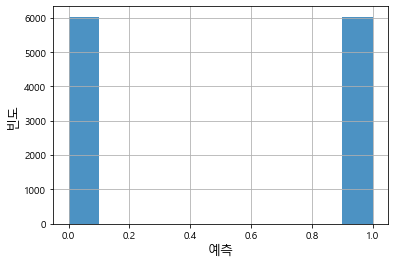

In [19]:
plt.hist(y_resampled, bins=10, alpha=.8)
plt.ylabel("빈도", fontsize=13)
plt.xlabel("예측", fontsize=13)
plt.grid()
plt.show()

In [20]:
#정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = scaler.fit_transform(X_resampled)

## 군집분석

### K-Means
- 내가 7일 기준은 임의로 정한 기준이라 군집화 확인

#### 기본

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_sc)
kmeams_pred = kmeans.predict(df_sc)

In [22]:
from sklearn.metrics import confusion_matrix

print("Kmeans \n", confusion_matrix(y_resampled, kmeams_pred))

Kmeans 
 [[6003   30]
 [6013   20]]


C:\Users\yhg31\AppData\Local\Temp/ipykernel_1624/4171785245.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\yhg31\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


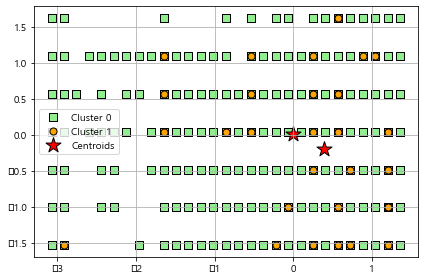

In [23]:
plt.scatter(df_sc[kmeams_pred == 0, 0],
            df_sc[kmeams_pred == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 0')
plt.scatter(df_sc[kmeams_pred == 1, 0],
            df_sc[kmeams_pred == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [24]:
km_df=X_resampled.copy()
km_df["target"]=y_resampled
km_df.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,target
0,10,1,13,3433885,257,353337,9763,23405,0,0,1,48,17,1
1,1,0,2,222315,0,4642,126,1359,0,0,1,29,7,0
2,24,5,1,518305,1070,14089,410,2175,0,0,1,39,3,0
3,24,5,20,883321,330,13347,197,2524,0,0,1,41,4,0
4,10,6,4,68512,207,7260,23,1507,0,0,1,48,14,0


In [25]:
from sklearn.metrics import silhouette_samples, silhouette_score

s_coef = silhouette_samples(df_sc, kmeams_pred)
s_mean = silhouette_score(df_sc, kmeams_pred)
s_mean

0.7766544306353446

In [26]:
#데이터가 퍼진 정도. 작을수록 좋음
print("데이터 퍼진 정도 : {0:.3f}".format(kmeans.inertia_))

데이터 퍼진 정도 : 144640.252


In [27]:
inertias = []

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_sc)
    c_labels = kmeans.labels_
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

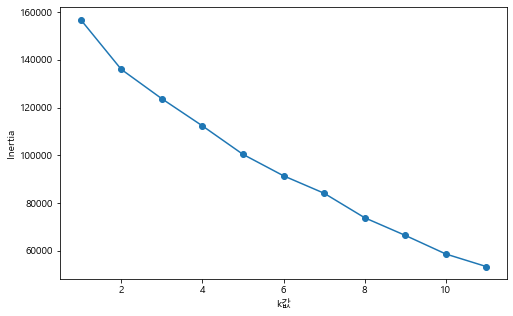

In [28]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 12), inertias, '-o')
plt.xlabel('k값')
plt.ylabel('Inertia')

In [29]:
scsc=pd.DataFrame(df_sc, columns=X_resampled.columns)
scsc

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
0,-1.65,-1.01,-0.32,1.13,-0.32,1.18,1.51,0.28,-0.06,-0.11,0.15,0.15,1.12
1,-3.07,-1.54,-0.91,-0.24,-0.48,-0.18,-0.09,-0.08,-0.06,-0.11,0.15,-0.71,-0.49
2,0.57,1.09,-0.96,-0.11,0.18,-0.15,-0.05,-0.07,-0.06,-0.11,0.15,-0.26,-1.14
3,0.57,1.09,0.06,0.04,-0.28,-0.15,-0.08,-0.06,-0.06,-0.11,0.15,-0.17,-0.98
4,-1.65,1.62,-0.80,-0.30,-0.35,-0.17,-0.11,-0.08,-0.06,-0.11,0.15,0.15,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061,0.57,0.04,-0.58,-0.21,-0.38,-0.16,-0.09,-0.07,-0.06,-0.11,0.15,0.64,0.15
12062,0.41,1.09,-0.42,-0.17,0.15,-0.14,-0.09,-0.09,-0.06,-0.11,0.15,1.96,0.15
12063,0.41,1.09,-0.48,-0.25,-0.34,-0.17,-0.10,-0.07,-0.06,-0.11,0.15,-0.62,1.12
12064,-0.54,-1.01,0.91,-0.20,-0.36,-0.16,-0.09,-0.09,-0.06,-0.11,0.15,-0.71,-0.17


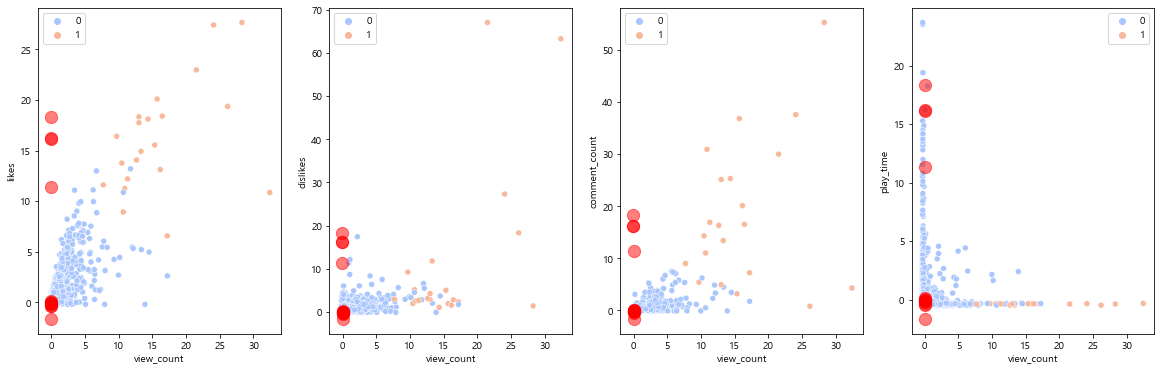

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scsc)
plt.figure(figsize=(20, 6))

plt.subplot(141)
sns.scatterplot(x='view_count', y='likes', data=scsc, hue=kmeans.labels_,palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

plt.subplot(142)
sns.scatterplot(x='view_count', y='dislikes', data=scsc, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

plt.subplot(143)
sns.scatterplot(x='view_count', y='comment_count', data=scsc, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

plt.subplot(144)
sns.scatterplot(x='view_count', y='play_time', data=scsc, hue=kmeans.labels_, palette='coolwarm')
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], c='red', alpha=0.5, s=150)

#### PCA

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(km_df)

km_df['pca_x'] = pca_transformed[:,0]
km_df['pca_y'] = pca_transformed[:,1]
km_df.head(3)

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,target,pca_x,pca_y
0,10,1,13,3433885,257,353337,9763,23405,0,0,1,48,17,1,2669712.59,-53101.86
1,1,0,2,222315,0,4642,126,1359,0,0,1,29,7,0,-560151.75,-5347.27
2,24,5,1,518305,1070,14089,410,2175,0,0,1,39,3,0,-264569.23,12755.92


In [32]:
km_df["cluster"]=kmeans.labels_
km_df.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,target,pca_x,pca_y,cluster
0,10,1,13,3433885,257,353337,9763,23405,0,0,1,48,17,1,2669712.59,-53101.86,0
1,1,0,2,222315,0,4642,126,1359,0,0,1,29,7,0,-560151.75,-5347.27,0
2,24,5,1,518305,1070,14089,410,2175,0,0,1,39,3,0,-264569.23,12755.92,0
3,24,5,20,883321,330,13347,197,2524,0,0,1,41,4,0,98800.70,47369.70,0
4,10,6,4,68512,207,7260,23,1507,0,0,1,48,14,0,-713045.72,-22245.48,0


In [33]:
km_df.groupby(["target", "cluster"])["view_count"].count()

target  cluster
0       0          6030
        1             3
1       0          6015
        1            18
Name: view_count, dtype: int64

C:\Users\yhg31\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


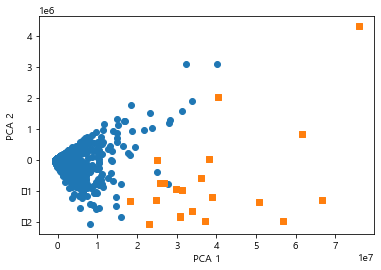

In [34]:
marker0_ind = km_df[km_df['cluster']==0].index
marker1_ind = km_df[km_df['cluster']==1].index

plt.scatter(x=km_df.loc[marker0_ind,'pca_x'], y=km_df.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=km_df.loc[marker1_ind,'pca_x'], y=km_df.loc[marker1_ind,'pca_y'], marker='s')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [35]:
ss_df = StandardScaler().fit_transform(X_resampled)
ss_df = pd.DataFrame(ss_df, index=X_resampled.index, columns=X_resampled.columns)
ss_df.head()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
0,-1.65,-1.01,-0.32,1.13,-0.32,1.18,1.51,0.28,-0.06,-0.11,0.15,0.15,1.12
1,-3.07,-1.54,-0.91,-0.24,-0.48,-0.18,-0.09,-0.08,-0.06,-0.11,0.15,-0.71,-0.49
2,0.57,1.09,-0.96,-0.11,0.18,-0.15,-0.05,-0.07,-0.06,-0.11,0.15,-0.26,-1.14
3,0.57,1.09,0.06,0.04,-0.28,-0.15,-0.08,-0.06,-0.06,-0.11,0.15,-0.17,-0.98
4,-1.65,1.62,-0.80,-0.30,-0.35,-0.17,-0.11,-0.08,-0.06,-0.11,0.15,0.15,0.64


In [36]:
pca = PCA(n_components = 13)
pca_array = pca.fit_transform(ss_df)
pca_df = pd.DataFrame(pca_array, index=ss_df.index,
                      columns=[f"pca{num+1}" for num in range(ss_df.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13
0,2.26,0.14,-1.38,0.73,-0.47,0.59,-0.04,0.96,0.23,-0.05,1.05,-0.25,-0.18
1,0.15,-1.85,-2.06,1.21,0.31,1.40,0.07,0.80,1.24,-0.38,0.32,0.31,0.09
2,-0.30,-1.06,0.81,-0.89,0.73,-0.40,-0.17,-0.19,-0.49,-0.50,-0.03,-0.04,0.00
3,-0.22,-0.41,0.55,-0.76,0.75,-0.77,0.18,-0.58,-0.03,-0.12,-0.09,-0.11,0.11
4,-0.13,-0.53,-1.04,-0.31,0.96,-1.03,-0.61,1.67,0.13,-0.11,0.10,0.24,0.01


In [37]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(ss_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.98,0.23,0.23
pca2,1.46,0.11,0.34
pca3,1.11,0.09,0.43
pca4,1.08,0.08,0.51
pca5,1.01,0.08,0.59
pca6,1.00,0.08,0.66
pca7,0.94,0.07,0.74
pca8,0.87,0.07,0.80
pca9,0.83,0.06,0.87
pca10,0.69,0.05,0.92


In [38]:
pca1 = PCA(n_components = 8)
pca_array1 = pca1.fit_transform(ss_df)
pca_df1 = pd.DataFrame(pca_array1, index=ss_df.index)
pca_df1.head()

,0,1,2,3,4,5,6,7
0,2.26,0.14,-1.38,0.73,-0.47,0.59,-0.04,0.96
1,0.15,-1.85,-2.06,1.21,0.31,1.40,0.07,0.80
2,-0.30,-1.06,0.81,-0.89,0.73,-0.40,-0.17,-0.19
3,-0.22,-0.41,0.55,-0.76,0.75,-0.77,0.18,-0.58
4,-0.13,-0.53,-1.04,-0.31,0.96,-1.03,-0.61,1.67


In [39]:
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(pca_df1)

KMeans(n_clusters=2)

In [40]:
print("데이터 퍼진 정도 : {0:.3f}".format(kmeans1.inertia_))

데이터 퍼진 정도 : 105412.148


In [41]:
s_kmeans1 = KMeans(n_clusters=2)
s_kmeans1.fit(pca_df1)

s_coef = silhouette_samples(pca_df1,y_resampled)
s_mean = silhouette_score(pca_df1, kmeans1.labels_)
s_mean

0.8919931429305082

In [42]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(pca_df1)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

In [43]:
n_clusters = range(2, 15)

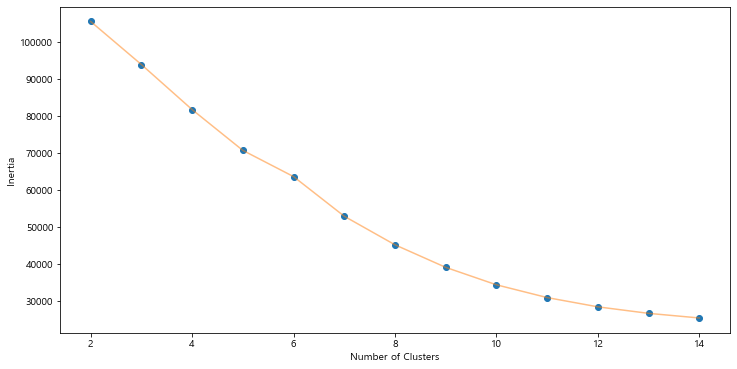

In [44]:
change_n_clusters(n_clusters, pca_df1)

In [45]:
scsc.corr()

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len
category,1.00,0.03,0.09,-0.14,0.08,-0.18,-0.07,-0.10,0.02,-0.03,-0.03,0.10,0.02
publishedAt_week,0.03,1.00,-0.01,-0.03,-0.01,-0.03,0.00,-0.02,-0.01,-0.02,0.00,0.02,-0.05
tags_len,0.09,-0.01,1.00,0.01,-0.00,-0.01,0.00,-0.02,0.02,0.04,0.08,0.26,0.11
view_count,-0.14,-0.03,0.01,1.00,-0.04,0.84,0.62,0.70,0.07,0.01,0.02,-0.00,0.03
play_time,0.08,-0.01,-0.00,-0.04,1.00,-0.04,-0.02,-0.03,0.02,0.00,0.00,0.07,-0.05
likes,-0.18,-0.03,-0.01,0.84,-0.04,1.00,0.50,0.77,0.01,-0.02,0.02,-0.01,0.04
dislikes,-0.07,0.00,0.00,0.62,-0.02,0.50,1.00,0.42,0.03,-0.01,-0.03,-0.02,0.01
comment_count,-0.10,-0.02,-0.02,0.70,-0.03,0.77,0.42,1.00,-0.01,-0.01,0.01,-0.03,0.01
comments_disabled,0.02,-0.01,0.02,0.07,0.02,0.01,0.03,-0.01,1.00,0.06,-0.03,-0.02,-0.03
ratings_disabled,-0.03,-0.02,0.04,0.01,0.00,-0.02,-0.01,-0.01,0.06,1.00,-0.01,0.04,0.02


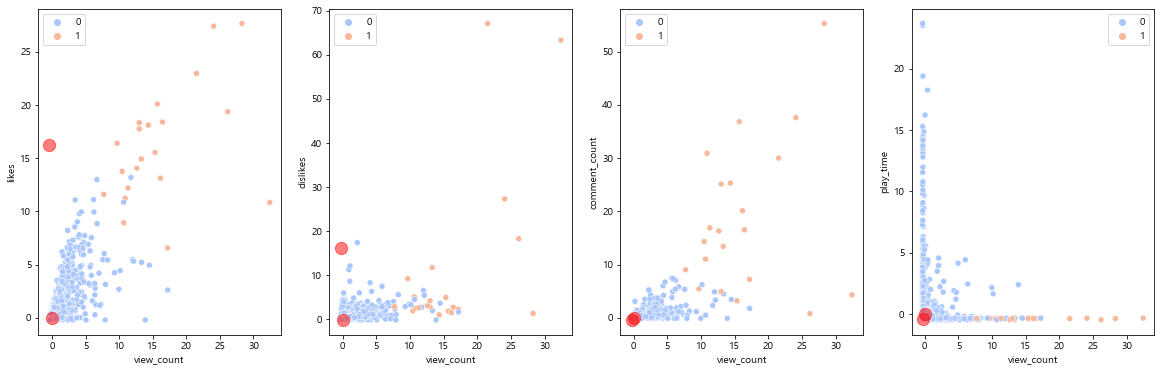

In [46]:
s_kmeans1 = KMeans(n_clusters=2)
s_kmeans1.fit(scsc)
plt.figure(figsize=(20, 6))
plt.subplot(141)
sns.scatterplot(x='view_count', y='likes', data=scsc, hue=s_kmeans1.labels_,palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 2], s_kmeans1.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)
plt.subplot(142)
sns.scatterplot(x='view_count', y='dislikes', data=scsc, hue=s_kmeans1.labels_, palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 1], s_kmeans1.cluster_centers_[:, 3], c='red', alpha=0.5, s=150)
plt.subplot(143)
sns.scatterplot(x='view_count', y='comment_count', data=scsc, hue=s_kmeans1.labels_, palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 1], s_kmeans1.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)
plt.subplot(144)
sns.scatterplot(x='view_count', y='play_time', data=scsc, hue=s_kmeans1.labels_, palette='coolwarm')
plt.scatter(s_kmeans1.cluster_centers_[:, 1], s_kmeans1.cluster_centers_[:, 2], c='red', alpha=0.5, s=150)

### DB-SCAN

In [47]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=5)
dbs_pred = pd.DataFrame(dbscan.fit_predict(df_sc))
dbs_pred.columns=['predict']

df_dbs = pd.concat([X_resampled, dbs_pred],axis=1)
df_dbs

,category,publishedAt_week,tags_len,view_count,play_time,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,video_len,channel_len,predict
0,10,1,13,3433885,257,353337,9763,23405,0,0,1,48,17,-1
1,1,0,2,222315,0,4642,126,1359,0,0,1,29,7,-1
2,24,5,1,518305,1070,14089,410,2175,0,0,1,39,3,0
3,24,5,20,883321,330,13347,197,2524,0,0,1,41,4,0
4,10,6,4,68512,207,7260,23,1507,0,0,1,48,14,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12061,24,3,8,295863,167,10071,134,1842,0,0,1,59,11,16
12062,23,5,11,389749,1014,15681,117,974,0,0,1,88,11,0
12063,23,5,10,183201,224,8802,62,1889,0,0,1,31,17,0
12064,17,1,36,321889,198,9108,120,937,0,0,1,29,9,-1


In [48]:
df_dbs["predict"].value_counts()

-1      5273
 16      987
 3       928
 0       783
 5       778
        ... 
 47        4
 140       4
 117       3
 145       3
 85        2
Name: predict, Length: 149, dtype: int64

### SOM

In [49]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 13, sigma = 1, learning_rate = 0.5)
som.random_weights_init(df_sc)
som.train_random(data = df_sc, num_iteration = 100)

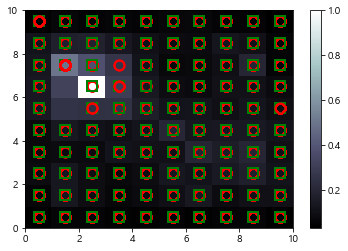

In [50]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(df_sc):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y_resampled[i]],
         markeredgecolor = colors[y_resampled[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

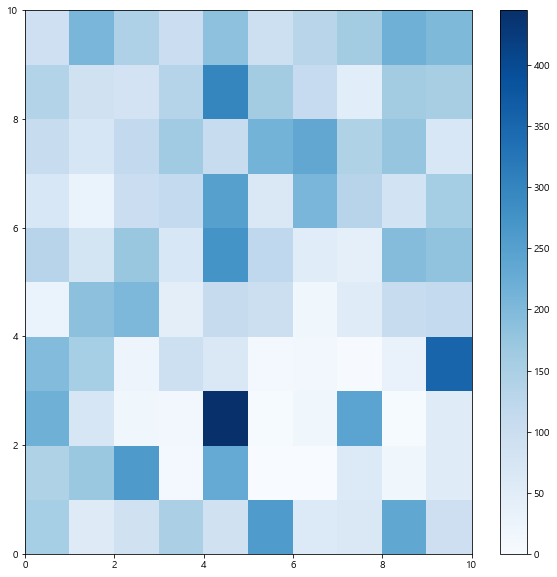

In [51]:
plt.figure(figsize=(10, 10))
frequencies = np.zeros((10, 10))
for position, values in som.win_map(df_sc).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

In [52]:
#이상 데이터
mappings = som.win_map(df_sc)
frauds = np.concatenate((mappings[(1,4)], mappings[(2,9)]), axis = 0)
frauds = scaler.inverse_transform(frauds)
frauds.shape

(286, 13)

In [53]:
frauds

array([[15.,  2., 13., ...,  1., 83.,  9.],
       [10.,  1., 13., ...,  1., 55.,  9.],
       [10.,  1., 12., ...,  1., 49.,  5.],
       ...,
       [23.,  3., 17., ...,  1., 44., 10.],
       [23.,  3., 19., ...,  1., 42.,  8.],
       [22.,  3., 26., ...,  1., 39.,  8.]])

In [54]:
som1 = MiniSom(x = 10, y = 10, input_len = 13, sigma = 1, learning_rate = 0.5)
som1.pca_weights_init(df_sc)
som1.train_random(data = df_sc, num_iteration = 100)

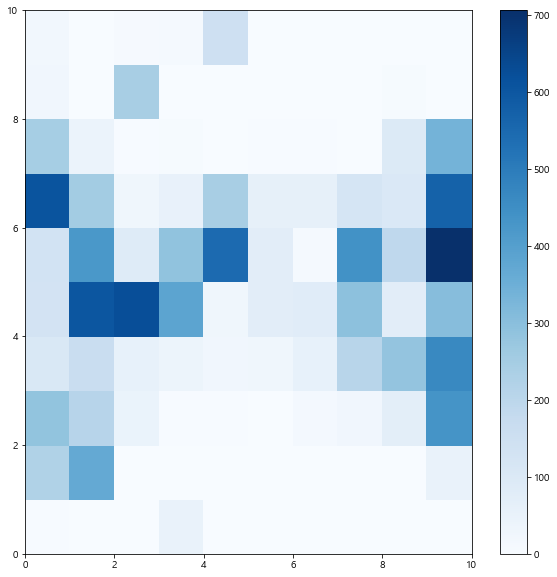

In [55]:
plt.figure(figsize=(10, 10))
frequencies = np.zeros((10, 10))
for position, values in som1.win_map(df_sc).items():
    frequencies[position[0], position[1]] = len(values)
plt.pcolor(frequencies, cmap='Blues')
plt.colorbar()
plt.show()

### GMM

In [56]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, random_state = 0)
gmm.fit(df_sc)
gmm_cluster_labels = gmm.predict(df_sc)

X_resampled['gmm_cluster'] = gmm_cluster_labels
X_resampled['target'] = y_resampled

X1 = X_resampled.groupby(['target'])['gmm_cluster'].value_counts()
X1

target  gmm_cluster
0       1              5407
        0               626
1       1              5487
        0               546
Name: gmm_cluster, dtype: int64

In [57]:
target_lst = np.unique(y_resampled)
markers = ['o','s']

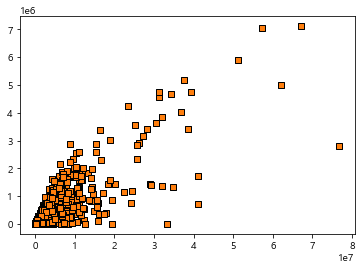

In [58]:
for target in target_lst:
    target_cluster = X_resampled[X_resampled['target']==target]
    plt.scatter(x=X_resampled['view_count'],
               y=X_resampled['likes'],
               edgecolor='k', marker=markers[target])
plt.show()

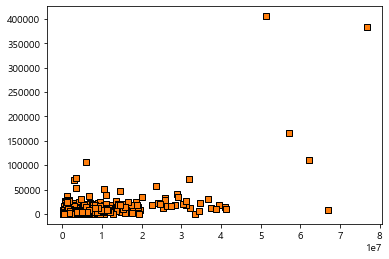

In [59]:
for target in target_lst:
    target_cluster = X_resampled[X_resampled['target']==target]
    plt.scatter(x=X_resampled['view_count'],
               y=X_resampled['dislikes'],
               edgecolor='k', marker=markers[target])
plt.show()

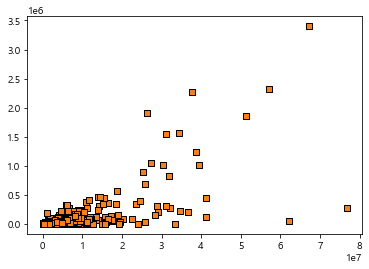

In [60]:
for target in target_lst:
    target_cluster = X_resampled[X_resampled['target']==target]
    plt.scatter(x=X_resampled['view_count'],
               y=X_resampled['comment_count'],
               edgecolor='k', marker=markers[target])
plt.show()